<a href="https://colab.research.google.com/github/RAFA-CK/python4/blob/main/gio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

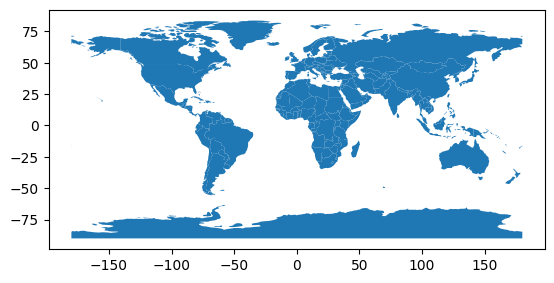

In [ ]:
import geopandas as gpd

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world.plot()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.5 MB/s eta 0:00:00


<Axes: >

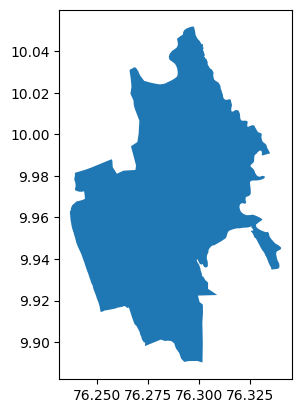

In [ ]:
import sys
!{sys.executable} -m pip install osmnx

import osmnx as ox

gdf = ox.geocode_to_gdf("Kochi, India")

gdf.plot()

In [ ]:
# View first rows
print(gdf.head())

# CRS (coordinate system)
print(gdf.crs)

# Geometry type
print(gdf.geometry.type)

# Columns
print(gdf.columns)

                                            geometry  bbox_west  bbox_south  \
0  POLYGON ((76.23694 9.96144, 76.23696 9.96141, ...  76.236945    9.890287   

   bbox_east  bbox_north   place_id  osm_type    osm_id       lat        lon  \
0  76.340132   10.051832  232663550  relation  11322588  9.971145  76.284638   

      class             type  place_rank  importance      addresstype   name  \
0  boundary  local_authority          25    0.402104  local_authority  Kochi   

                                        display_name  
0  Kochi, Ernakulam, Kanayannur, Ernakulam, Keral...  
epsg:4326
0    Polygon
dtype: object
Index(['geometry', 'bbox_west', 'bbox_south', 'bbox_east', 'bbox_north',
       'place_id', 'osm_type', 'osm_id', 'lat', 'lon', 'class', 'type',
       'place_rank', 'importance', 'addresstype', 'name', 'display_name'],
      dtype='object')


In [ ]:
# Project to UTM (meters)
gdf_proj = gdf.to_crs(epsg=32643)   # UTM zone for Delhi

# Area (in sq km)
gdf_proj["area_sqkm"] = gdf_proj.area / 1e6

# Perimeter (in km)
gdf_proj["perimeter_km"] = gdf_proj.length / 1000

print(gdf_proj[["area_sqkm", "perimeter_km"]])


   area_sqkm  perimeter_km
0  99.380658     68.108306


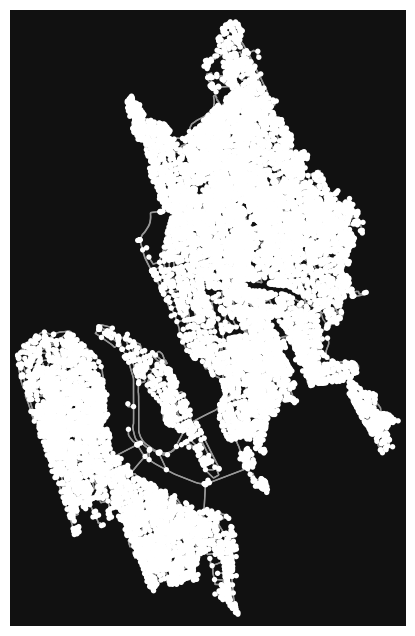

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Download road network
G = ox.graph_from_place("kochi, India", network_type="drive")

# Plot roads
ox.plot_graph(G)


In [ ]:
stats = ox.basic_stats(G)

for k, v in stats.items():
    print(k, ":", v)


n : 13572
m : 32819
k_avg : 4.836280577659888
edge_length_total : 2450087.5807205243
edge_length_avg : 74.65454708310808
streets_per_node_avg : 2.490126731506042
streets_per_node_counts : {0: 0, 1: 3955, 2: 2, 3: 8636, 4: 968, 5: 9, 6: 2}
streets_per_node_proportions : {0: 0.0, 1: 0.2914087827880931, 2: 0.00014736221632773356, 3: 0.6363100501031536, 4: 0.07132331270262304, 5: 0.000663129973474801, 6: 0.00014736221632773356}
intersection_count : 9617
street_length_total : 1272712.0110623192
street_segment_count : 16869
street_length_avg : 75.44679655357871
circuity_avg : 1.0594799941855422
self_loop_proportion : 0.0005928033671231252


Number of buildings: 48129


<Axes: >

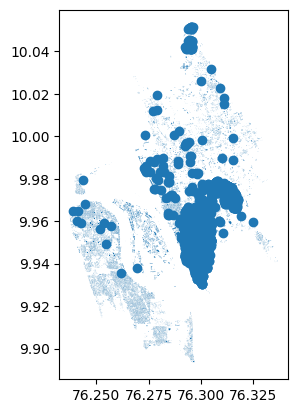

In [ ]:
from shapely.geometry import Polygon

# Get polygon
polygon = gdf.geometry.iloc[0]

# Download buildings
buildings = ox.features_from_polygon(
    polygon,
    tags={"building": True}
)

print("Number of buildings:", len(buildings))

buildings.plot()


In [ ]:
area = gdf_proj["area_sqkm"].iloc[0]

density = len(buildings) / area

print("Building Density per sq km:", density)


Building Density per sq km: 484.2894056009074


/tmp/ipython-input-2875574209.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["centroid"] = buildings.centroid


<Axes: >

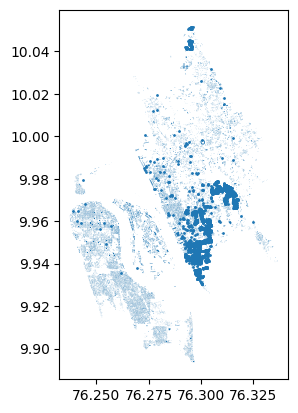

In [ ]:
# Count buildings per ward (if available)
buildings["centroid"] = buildings.centroid

buildings.plot(markersize=1)


In [ ]:
landuse = ox.features_from_polygon(
    polygon,
    tags={"landuse": True}
)

landuse["landuse"].value_counts()


,count
landuse,
residential,405
commercial,96
industrial,43
religious,38
grass,36
recreation_ground,34
education,27
cemetery,24
farmland,17


<Axes: >

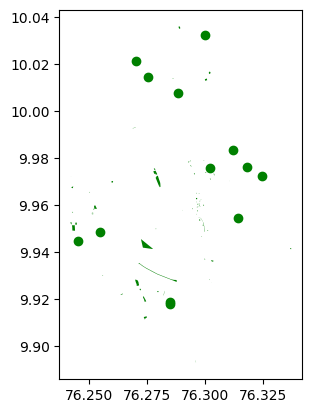

In [ ]:
green = ox.features_from_polygon(
    polygon,
    tags={"leisure": "park"}
)

green.plot(color="green")
